In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img0 = cv2.imread('img/test.jpg')
img1 = cv2.imread('img/test1.jpg')
img2 = cv2.imread('img/test2.jpg')
img3 = cv2.imread('img/test3.jpg')
img4 = cv2.imread('img/test4.jpg')
img=img0

[[[  3 124  39]
  [  6 141  39]
  [  9 136  32]
  ...
  [ 27 123   9]
  [ 33 101  11]
  [ 36  92  14]]

 [[  6 140  38]
  [  9 157  39]
  [ 13 155  32]
  ...
  [ 27 125  10]
  [ 36 104  12]
  [ 33  80  14]]

 [[ 18 205  56]
  [ 24 204  47]
  [ 32 176  26]
  ...
  [ 27 154  13]
  [ 36 148  12]
  [ 36 134  11]]

 ...

 [[ 16 192  26]
  [ 16 192  26]
  [ 16 192  26]
  ...
  [  0 189   0]
  [  0 190   0]
  [  0 190   0]]

 [[ 16 192  26]
  [ 16 192  26]
  [ 16 192  26]
  ...
  [  0 189   0]
  [  0 190   0]
  [  0 190   0]]

 [[ 16 191  26]
  [ 16 191  26]
  [ 16 191  26]
  ...
  [  0 189   0]
  [  0 189   0]
  [  0 190   0]]]


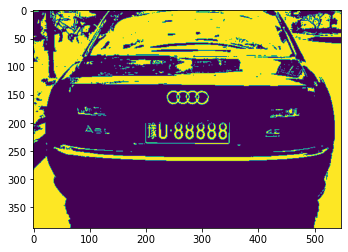

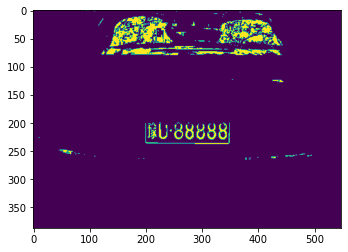

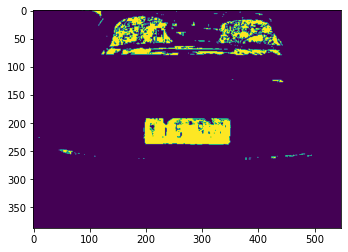

1756 0.24419413155333056


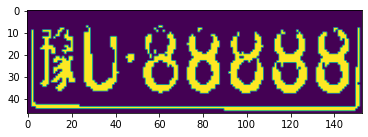

1886 0.262272284800445


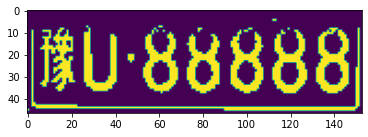

153 47 3.25531914893617 7191


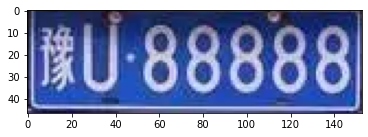

52 0.9285714285714286


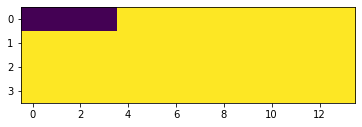

56 1.0


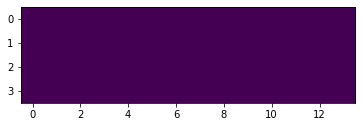

14 4 3.5 56


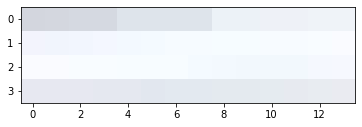

81 0.9


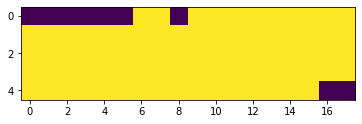

90 1.0


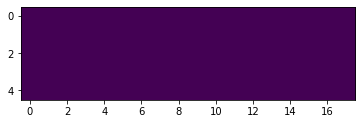

18 5 3.6 90


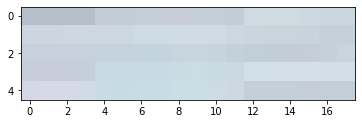

226 0.8014184397163121


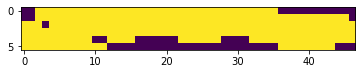

281 0.9964539007092199


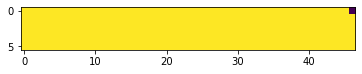

47 6 7.833333333333333 282


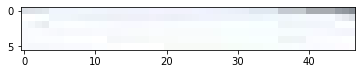

473 0.6615384615384615


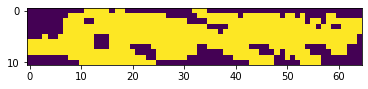

708 0.9902097902097902


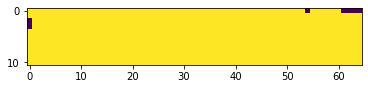

65 11 5.909090909090909 715


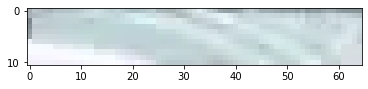

188 0.6836363636363636


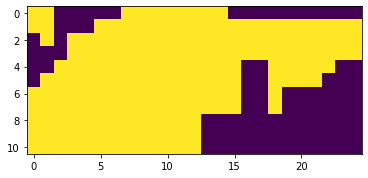

275 1.0


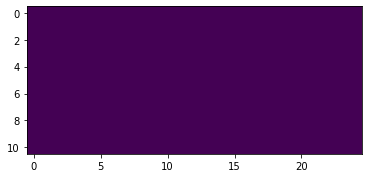

25 11 2.272727272727273 275


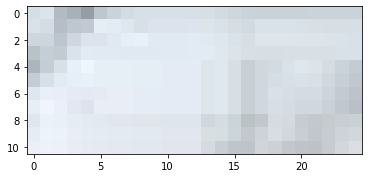

466 0.761437908496732


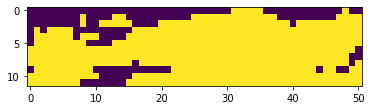

598 0.9771241830065359


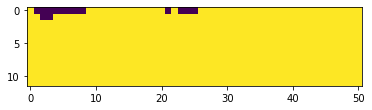

51 12 4.25 612


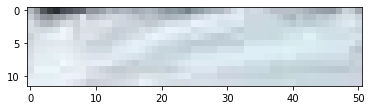

76 0.8444444444444444


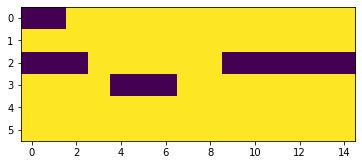

90 1.0


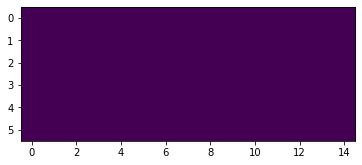

15 6 2.5 90


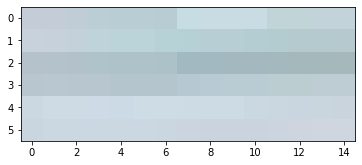

40 0.9090909090909091


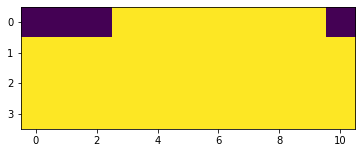

44 1.0


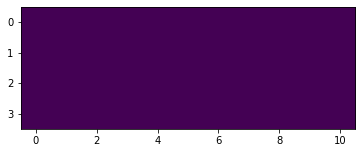

11 4 2.75 44


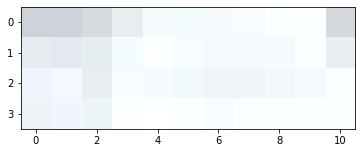

468 0.6358695652173914


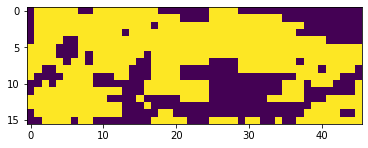

736 1.0


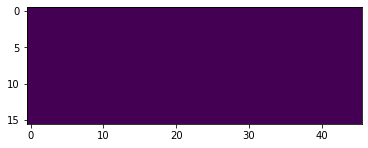

46 16 2.875 736


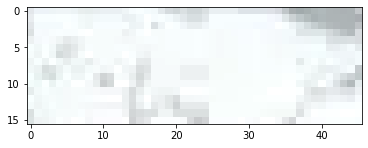

ZeroDivisionError: division by zero

In [123]:
# to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# to hls
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# find white color
mask_hls_white = cv2.inRange(img_hls, (0, 150, 0), (255, 255, 255))
# find only blue color
print(img_hls)
mask_hls_blue = cv2.inRange(img_hls, (90, 50, 50), (120, 255, 255))
mask_add = cv2.add(mask_hls_white, mask_hls_blue)
mask_subtract = cv2.subtract(mask_hls_white, mask_hls_blue)
mask_aim = cv2.subtract(mask_add, mask_subtract)
# bitwise_and mask
img_hls_white = cv2.bitwise_and(img, img, mask=mask_hls_white)
img_hls_blue = cv2.bitwise_and(img, img, mask=mask_hls_blue)
img_hls_white_blue_add = cv2.bitwise_and(img, img, mask=mask_add)
img_hls_white_blue_subtract = cv2.bitwise_and(img, img, mask=mask_subtract)
img_hls_white_blue_aim = cv2.bitwise_and(img, img, mask=mask_aim)

img_bgr_white = cv2.cvtColor(img_hls_white, cv2.COLOR_HLS2BGR)
img_bgr_blue = cv2.cvtColor(img_hls_blue, cv2.COLOR_HLS2BGR)
img_bgr_white_blue_add = cv2.cvtColor(img_hls_white_blue_add, cv2.COLOR_HLS2BGR)
img_bgr_white_blue_subtract = cv2.cvtColor(
    img_hls_white_blue_subtract, cv2.COLOR_HLS2BGR)
img_bgr_white_blue_aim = cv2.cvtColor(img_hls_white_blue_aim, cv2.COLOR_HLS2BGR)

img_hls_white_gray = cv2.cvtColor(img_hls_white, cv2.COLOR_BGR2GRAY)
img_hls_blue_gray = cv2.cvtColor(img_hls_blue, cv2.COLOR_BGR2GRAY)
img_hls_white_blue_add_gray = cv2.cvtColor(img_bgr_white_blue_add, cv2.COLOR_BGR2GRAY)
img_hls_white_blue_subtract_gray = cv2.cvtColor(
    img_bgr_white_blue_subtract, cv2.COLOR_BGR2GRAY)
img_hls_white_blue_aim_gray = cv2.cvtColor(
    img_bgr_white_blue_aim, cv2.COLOR_BGR2GRAY)

img_bgr_white_gray = cv2.cvtColor(img_bgr_white, cv2.COLOR_BGR2GRAY)
img_bgr_blue_gray = cv2.cvtColor(img_bgr_blue, cv2.COLOR_BGR2GRAY)
img_bgr_white_blue_add_gray = cv2.cvtColor(
    img_bgr_white_blue_add, cv2.COLOR_BGR2GRAY)
img_bgr_white_blue_subtract_gray = cv2.cvtColor(
    img_bgr_white_blue_subtract, cv2.COLOR_BGR2GRAY)
img_bgr_white_blue_aim_gray = cv2.cvtColor(
    img_bgr_white_blue_aim, cv2.COLOR_BGR2GRAY)

# 图像二值化
img_white_bin = cv2.threshold(img_bgr_white_gray, 127, 255, cv2.THRESH_BINARY)[1]
img_blue_bin = cv2.threshold(img_bgr_blue_gray, 127, 255, cv2.THRESH_BINARY)[1]
img_white_blue_add_bin = cv2.threshold(
    img_bgr_white_blue_add_gray, 127, 255, cv2.THRESH_BINARY)[1]
img_white_blue_subtract_bin = cv2.threshold(
    img_bgr_white_blue_subtract_gray, 127, 255, cv2.THRESH_BINARY)[1]
img_white_blue_aim_bin = cv2.threshold(
    img_bgr_white_blue_aim_gray, 30, 255, cv2.THRESH_BINARY)[1]

plt.imshow(img_white_bin)
plt.show()
plt.imshow(img_blue_bin)
plt.show()
# plt.imshow(img_white_blue_add_bin)
# plt.show()
# plt.imshow(img_white_blue_subtract_bin)
# plt.show()
plt.imshow(img_white_blue_aim_bin)
plt.show()

# 获取 img_white_blue_aim_bin 连通区域
img_white_blue_aim_bin = cv2.bitwise_not(img_white_blue_aim_bin)
img_white_blue_aim_bin = cv2.dilate(img_white_blue_aim_bin, None, iterations=1)
img_white_blue_aim_bin = cv2.erode(img_white_blue_aim_bin, None, iterations=1)
img_white_blue_aim_bin = cv2.bitwise_not(img_white_blue_aim_bin)
# plt.imshow(img_white_blue_aim_bin)
# plt.show()

# print("white")
# findContours
contours, hierarchy = cv2.findContours(
    img_white_blue_aim_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_bgr = None
for i1 in contours:
    x, y, w, h = cv2.boundingRect(i1)
    if w > 2.2*h:
        # if w/h > 3.7 and w/h < 4 and w*h > 1000:
        blue_img = img_blue_bin[y:y+h, x:x+w]
        blue_cnt=np.sum(blue_img==255)
        print(blue_cnt,blue_cnt/(w*h))
        plt.imshow(blue_img)
        plt.show()
        white_img = img_white_bin[y:y+h, x:x+w]
        white_cnt = np.sum(white_img == 255)
        print(white_cnt, white_cnt/(w*h))
        plt.imshow(white_img)
        plt.show()
        print(w, h, w/h, w*h)
        plt.imshow(img_rgb[y:y+h, x:x+w])
        plt.show()
        result_bgr = img[y:y+h, x:x+w]
        # break
result_bgr_gray = cv2.cvtColor(result_bgr, cv2.COLOR_BGR2GRAY)


# 直方图

result_bgr_gray_hist = cv2.calcHist(
    [result_bgr_gray], [0], None, [256], [0, 256])
# 平滑
# result_bgr_gray_hist = cv2.blur(result_bgr_gray_hist, (30, 30))
# plt.plot(result_bgr_gray_hist)
# plt.show()
# result_bgr_gray_bin = cv2.adaptiveThreshold(
#     result_bgr_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


# num=[]
# for i in range(0, 256):
#     result_bgr_gray_bin = cv2.threshold(
#     result_bgr_gray, i, 255, cv2.THRESH_BINARY)[1]

#     # 连通域
#     num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
#         result_bgr_gray_bin, connectivity=4)
#     # if num_labels<17 and num_labels>15:
#     #     print(i,num_labels)
#     #     plt.imshow(result_bgr_gray_bin)
#     #     plt.show()
#     num.append(num_labels)
# # 平滑 Savitzky-Golay
# num_savitzky_golay = savgol_filter(num, 17, 2)

# plt.plot(num_savitzky_golay)
# plt.show()

reasonable_list = []
reasonable_cnt=[]
for i in range(100, 180):

    result_bgr_gray_bin = cv2.threshold(
        result_bgr_gray, i, 255, cv2.THRESH_BINARY)[1]

    # 连通域
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        result_bgr_gray_bin, connectivity=4)

    reasonable_list = []
    cnt = 0
    for i in range(1, num_labels):
        mask = labels == i
        cnt += np.sum(mask)
    for i in range(1, num_labels):
        mask = labels == i
        if np.sum(mask)/cnt < 0.2 and np.sum(mask)/cnt > 0.02:
            reasonable_list.append(i)
    if len(reasonable_list) >= 7:
        print(i)
        break
#         print(reasonable_list)
#     reasonable_cnt.append(len(reasonable_list))
# plt.plot(reasonable_cnt)
# plt.show()
# threshold_value = 0
# for i in range(0, len(reasonable_cnt)):
#     if(reasonable_cnt[i] >=7):
#         threshold_value = i+100
#         break

# result_bgr_gray_bin = cv2.threshold(
#     result_bgr_gray, threshold_value, 255, cv2.THRESH_BINARY)[1]

# # 连通域
# num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
#     result_bgr_gray_bin, connectivity=4)


char_contours=[]
avg_h=0
for i in reasonable_list:
    output = np.zeros((result_bgr.shape[0], result_bgr.shape[1], 1), np.uint8)
    mask = labels == i
    output[:, :, 0][mask] = 255
    sub_char_contours, hierarchy = cv2.findContours(
        output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in sub_char_contours:
        # char_contours.append(i)
        x, y, w, h = cv2.boundingRect(i)
        char_contours.append([x, y, w, h])
        avg_h+=h
avg_h/=len(char_contours)
result_bgr_cp = result_bgr.copy()
result_bgr_cp2 = result_bgr.copy()
# sort by x
char_contours.sort(key=lambda x: x[0])
print(char_contours)
# for i in char_contours:
#     x, y, w, h = i
#     cv2.rectangle(result_bgr_cp2, (x, y), (x + w, y + h), (0, 255, 0), 1)
licence_plate_sig_bin=[]
entire_result_bgr_gray_bin = cv2.threshold(
    result_bgr_gray, 127, 255, cv2.THRESH_BINARY)[1]
plt.imshow(entire_result_bgr_gray_bin)
plt.show()
for i in char_contours:
    if i[3]<avg_h*0.6 or i[3]>avg_h*1.4:
        continue
    licence_plate_sig_bin.append(entire_result_bgr_gray_bin[i[1]:i[1]+i[3],i[0]:i[0]+i[2]])
    plt.imshow(entire_result_bgr_gray_bin[i[1]:i[1]+i[3],i[0]:i[0]+i[2]])
    plt.show()


# output_gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
# output_bin = cv2.threshold(
#     output, 0, 255, cv2.THRESH_BINARY)[1]

# contours, hierarchy = cv2.findContours(
#     output_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# result_bgr_rect = result_bgr.copy()
# for cnt in contours:
#     x, y, w, h = cv2.boundingRect(cnt)
#     if h > 10:
#         cv2.rectangle(result_bgr_rect, (x, y), (x + w, y + h), (0, 255, 0), 1)

# plt_rgb = cv2.cvtColor(result_bgr_cp, cv2.COLOR_BGR2RGB)
# plt.imshow(plt_rgb)
# plt.show()
